First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

/tmp/ipython-input-4-2932502832.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='ffill').fillna(method='bfill')


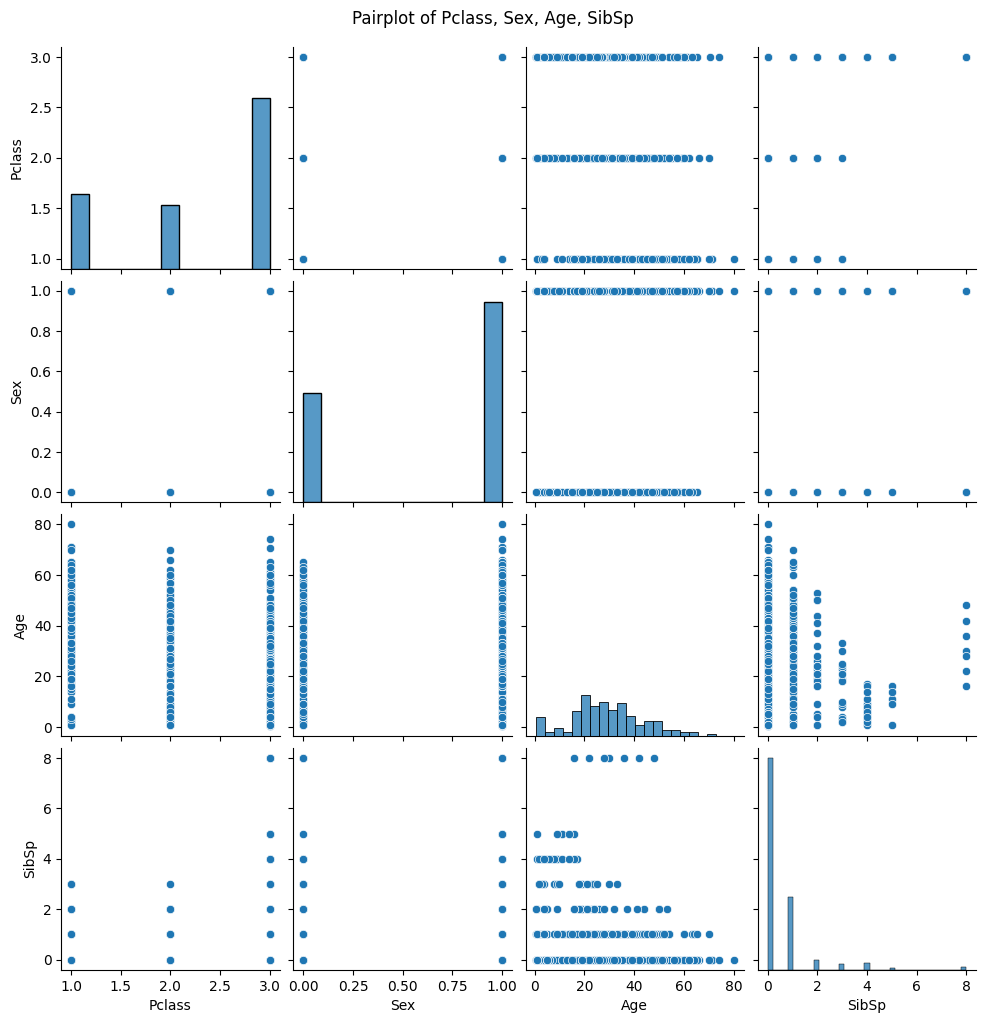

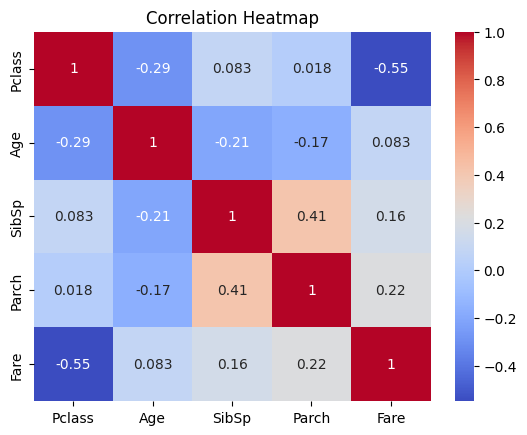

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(titanic_url)
print("First 5 rows:")
print(df.head())
print("\nInfo about dataset:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
df['Age'] = df['Age'].fillna(method='ffill').fillna(method='bfill')
df['Cabin'] = df['Cabin'].fillna("unknown")
df['Cabin'] = df['Cabin'].str[:5]
df.drop_duplicates(inplace=True)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
sns.pairplot(df[['Pclass', 'Sex', 'Age', 'SibSp']])
plt.suptitle("Pairplot of Pclass, Sex, Age, SibSp", y=1.02)
plt.show()
corr = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()